File and Data Field Descriptions
- train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

        PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

        HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

        CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

        Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

        Destination - The planet the passenger will be debarking to.

        Age - The age of the passenger.

        VIP - Whether the passenger has paid for special VIP service during the voyage.

        RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

        Name - The first and last names of the passenger.
        
        Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [682]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

sns.set(style='white')


In [761]:
# DUO_CMAP = ['#41436A', '#FF9677']
# TRIO_CMAP = ['#f2d0c2', '#c2f2d0', '#d0c2f2']
CMAP = ['#003f5c', '#ffa600', '#bc5090', '#7a5195']

In [684]:
df = pd.read_csv('../data/train.csv')

# EDA

First, we shall look to understand the data.

In [685]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [686]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [687]:
df.describe(include='object')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


Observations:
<li>Some missing values in all of the columns except for 'PassengerId' and 'Transported'.</li>
<li>Expenditure columns ('FoodCourt', 'ShoppingMall', etc.) are probably right skewed seeing that the max values are far above the 75th percentile. </li>
<li>We have two Gollux Reedalls, the only names that appear twice in the training data.</li>
<li>Earth is the most common 'HomePlanet'.</li>
<li>TRAPPIST-1e is the most common 'Destination'.</li>
<li>Only around 200 passengers are in VIPs. </li>



## Duplicate

In [688]:
df[df.Name == 'Gollux Reedall']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
827,0881_01,Europa,False,D/32/S,TRAPPIST-1e,41.0,False,3103.0,3.0,0.0,31.0,26.0,Gollux Reedall,False
2852,3081_01,Europa,False,C/118/S,55 Cancri e,50.0,False,0.0,1547.0,0.0,1784.0,1.0,Gollux Reedall,True


In [689]:
df.duplicated().sum()

0

<li>The dataset does not have any duplicated rows.</li>

## Missing Values

In [690]:
# how many missing values
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Look like every single feature column has missing values. Are they missing together or are they missing exclusively?

First, we'll take a look at how much data would we lose if we simply drop all the missing values.

In [691]:
df.dropna(axis=0)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


We'll be missing out on about 25% (about 2,000 rows) of the data by dropping all the NaN values indiscriminately. Before we decide on a solution for this problem, let's try to understand the missing values.

In [692]:
null_homeplanet = df[df.HomePlanet.isnull()]
null_homeplanet.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         2
Cabin             6
Destination       4
Age               2
VIP               3
RoomService       6
FoodCourt         2
ShoppingMall      7
Spa               3
VRDeck            1
Name              7
Transported       0
dtype: int64

In [693]:
null_homeplanet.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,199.000000,195.000000,199.000000,194.000000,198.000000,200.00000
mean,28.793970,202.789744,262.638191,141.742268,231.762626,284.91500
std,14.483455,444.926731,709.517135,578.257312,1057.962364,889.41508
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,38.000000,20.500000,25.000000,16.250000,19.750000,60.50000
max,74.000000,2083.000000,4387.000000,7104.000000,11001.000000,7121.00000


In [694]:
null_homeplanet.describe(include='object')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,201,0,199,195,197,198,194
unique,201,0,2,193,3,2,194
top,0064_02,NaN,False,F/1411/S,TRAPPIST-1e,False,Colatz Keen
freq,1,NaN,124,2,150,193,1


Seems like the missing values are pretty much exlusive based on the <code>HomePlanet</code> column. They appear to be randomly missing but is this true across all columns?

I wanted to be able to visualize all the missing values in a table/dataframe to see if the missing values are exclusive for each column.

In [695]:
columns = df.columns

# create a list of df containing only null values for each column
null_dfs = [df[df[col].isnull()] for col in columns]

# create another list that shows the total number of missing values for each column
nullsum_dfs = [df.isnull().sum() for df in null_dfs]

# combine them into a dataframe, cutting out PassengerId and Transported
nullsum_combine = pd.DataFrame(index=df.columns[1:-1], columns=columns[1:-1], data=nullsum_dfs[1:-1])


In [696]:
nullsum_combine.style.background_gradient(cmap='cividis')

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
HomePlanet,201,2,6,4,2,3,6,2,7,3,1,7
CryoSleep,2,217,7,4,1,7,2,3,8,5,7,10
Cabin,6,7,199,4,4,6,4,5,2,2,4,2
Destination,4,4,4,182,3,4,3,6,5,3,2,4
Age,2,1,4,3,179,6,1,4,4,1,4,3
VIP,3,7,6,4,6,203,4,4,4,2,1,1
RoomService,6,2,4,3,1,4,181,2,4,3,2,1
FoodCourt,2,3,5,6,4,4,2,183,2,5,6,5
ShoppingMall,7,8,2,5,4,4,4,2,208,2,6,4
Spa,3,5,2,3,1,2,3,5,2,183,3,6


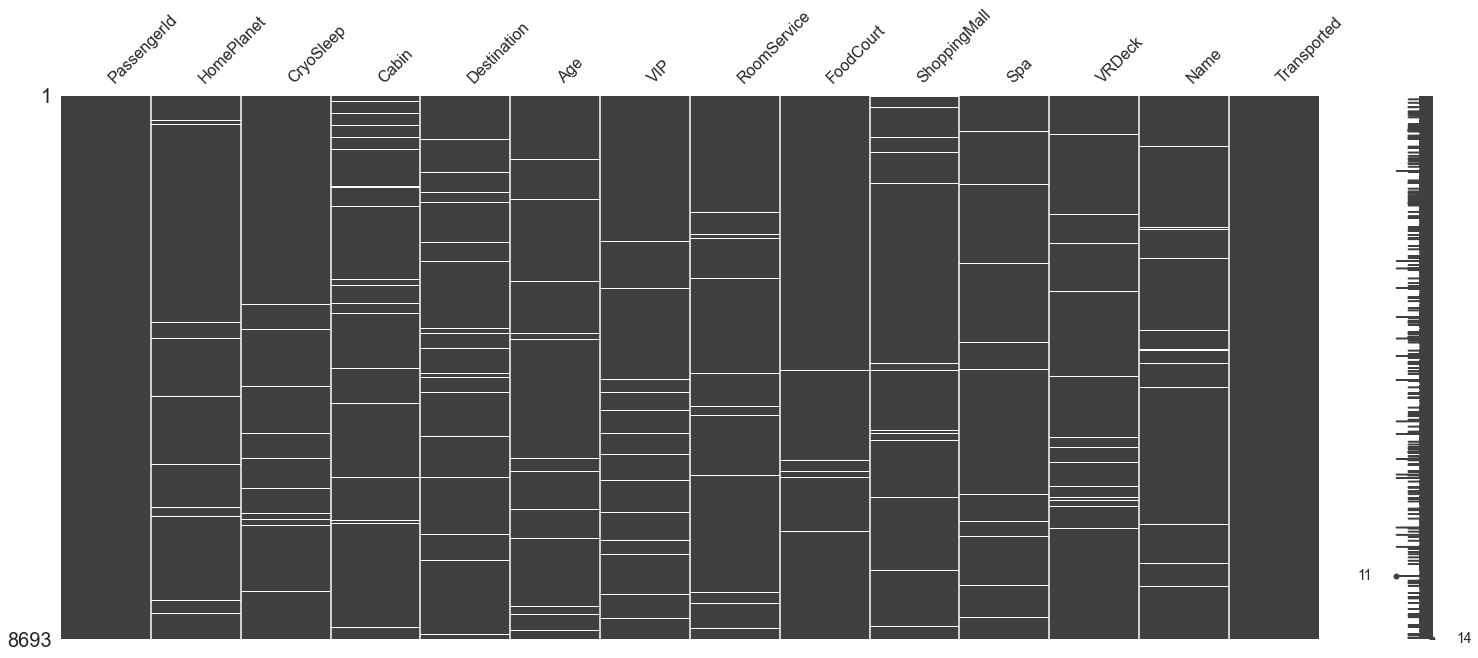

In [697]:
# visualize the missing values
msno.matrix(df);

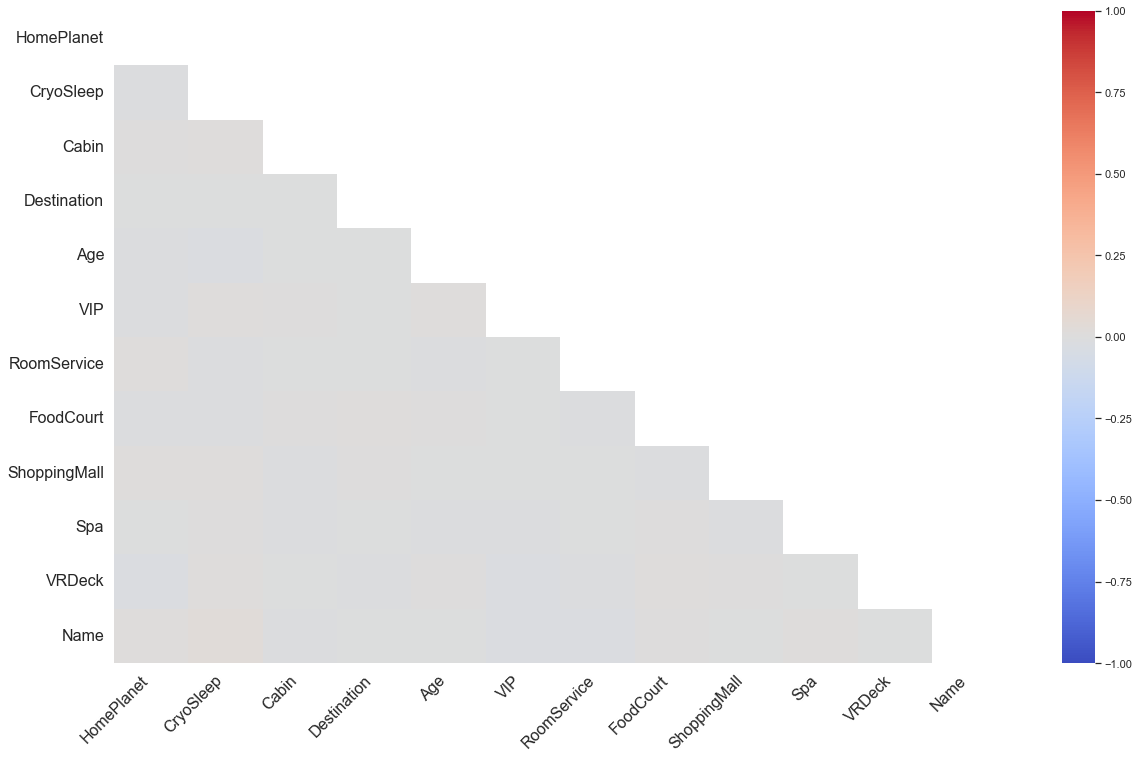

In [698]:
# see how strongly the presence or absence of one variable affects the presence of another
msno.heatmap(df, cmap='coolwarm');

The rows of the DataFrame above show how many missing values there are for that column name.
The columns represents a DataFrame that has all the missing values present for the respective column name. 

In essence, we are looking to see if the missing values overlap a lot between columns. And it appears that they are more or less exclusive from each other which is represented by the diagonal of larger numbers. 
<li>The matrix of missing values also show similar thing. </li>
<li>The heatmap confirms that there's little to no correlation between missing variables. It could be concluded that the data is Missing Completely At Random (MCAR) or at least Missing At Random (MAR).</li>
<li>It's probably safe to impute the missing data as they are likely to be MCAR or MAR.</li>

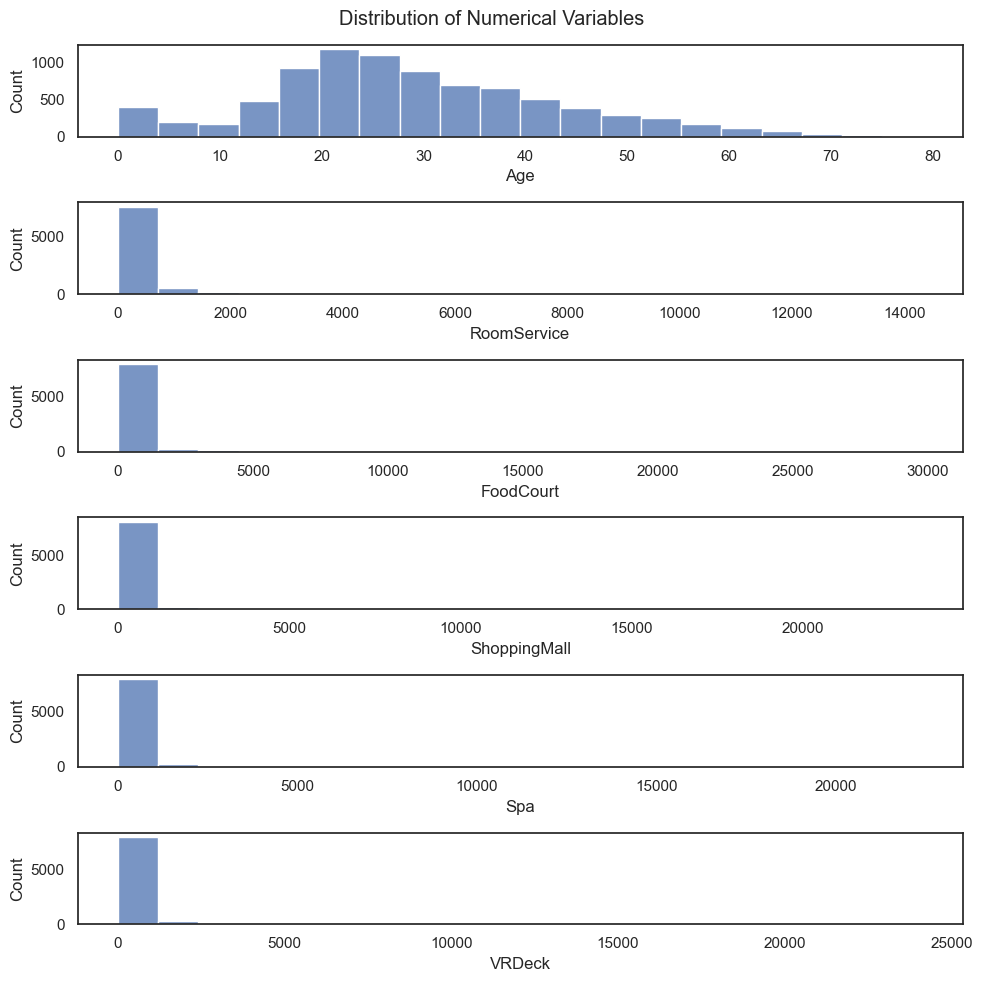

In [699]:
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig, ax = plt.subplots(figsize=(10,10), dpi=100, nrows=6)

fig.suptitle('Distribution of Numerical Variables')

for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, ax=ax[i], bins=20)

fig.tight_layout() 
    

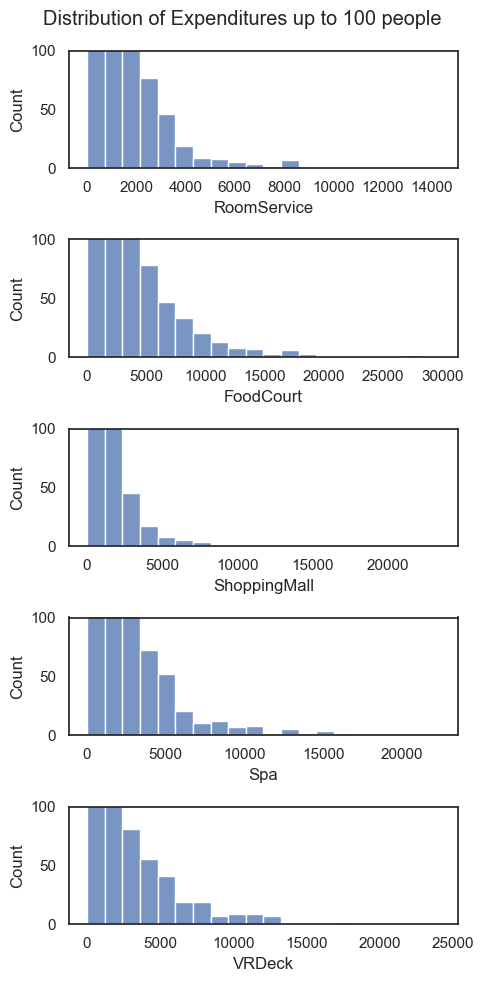

In [700]:
# zoom in the distribution
spend_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig, ax = plt.subplots(figsize=(5,10), dpi=100, nrows=5)
fig.suptitle('Distribution of Expenditures up to 100 people')

for i, col in enumerate(spend_cols):
    sns.histplot(data=df, x=col,ax=ax[i], bins=20)
    ax[i].set_ylim(0,100)

fig.tight_layout()
    

In [701]:
# see how many people not spend any money on any of the services/entertainment
zero_spend = df.query('RoomService==0 and FoodCourt==0 and ShoppingMall==0 and Spa==0 and VRDeck==0')
zero_spend['PassengerId'].count()

3247

<li>The 'Age' of the passengers are right-skewed, most of the passengers are in their 20s. We could impute the missing values for 'Age' with the median.</li>

<li>There are many "outliers" for the luxury spending in this dataset. But they are not outliers, it is the distribution of the data. </li>
<li>Most people do not spend any money on the luxury amenities.</li>

### Impute Continuous Variables

Given the distribution of the numerical variables, I think imputing them with median is a better choice than mean.

In [702]:
# save training data median of age
age_median = df['Age'].median()

# impute age
df['Age'] = df['Age'].fillna(df['Age'].median())

print(f"The median of age is: {age_median}")

The median of age is: 27.0


In [703]:
# impute luxury amenities columns
luxury_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for col in luxury_cols:
    df[col] = df[col].fillna(df[col].median())
    print(f"The median of {col} is {df[col].median()} ")

The median of RoomService is 0.0 
The median of FoodCourt is 0.0 
The median of ShoppingMall is 0.0 
The median of Spa is 0.0 
The median of VRDeck is 0.0 


We'll make a new feature called 'LuxurySpend' to capture the total expenditure for the amenities.

In [704]:
# make a new column showing the total luxury spend
df['LuxurySpend'] = df['RoomService']+df['FoodCourt']+df['ShoppingMall']+df['Spa']+df['VRDeck']

In [705]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
LuxurySpend       0
dtype: int64

### Categorical Variables

It seems reasonable to simply impute these columns with mode. However, before we commit. We should probably inspect them first. Maybe we can find some patterns that could help us make a more informed imputation.

#### Home Planet

In [706]:
df.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

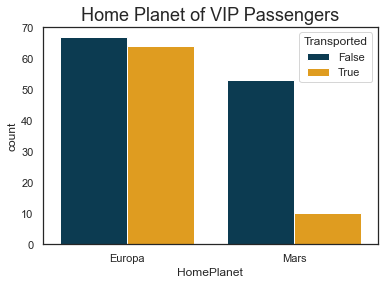

In [707]:
plt.title(fontsize=18, label='Home Planet of VIP Passengers')
sns.countplot(data=df[df.VIP==True], x='HomePlanet', hue='Transported', palette=CMAP);

In [708]:
df.groupby('HomePlanet')[['LuxurySpend']].describe()

LuxurySpend                                                      \
                 count         mean          std  min  25%     50%     75%   
HomePlanet                                                                   
Earth           4602.0   673.337462   771.307925  0.0  0.0   704.0   888.0   
Europa          2131.0  3451.624589  4845.099433  0.0  0.0  1901.0  5346.0   
Mars            1759.0  1051.256964  1343.371706  0.0  0.0   946.0  1702.5   

                     
                max  
HomePlanet           
Earth        6335.0  
Europa      35987.0  
Mars        10801.0

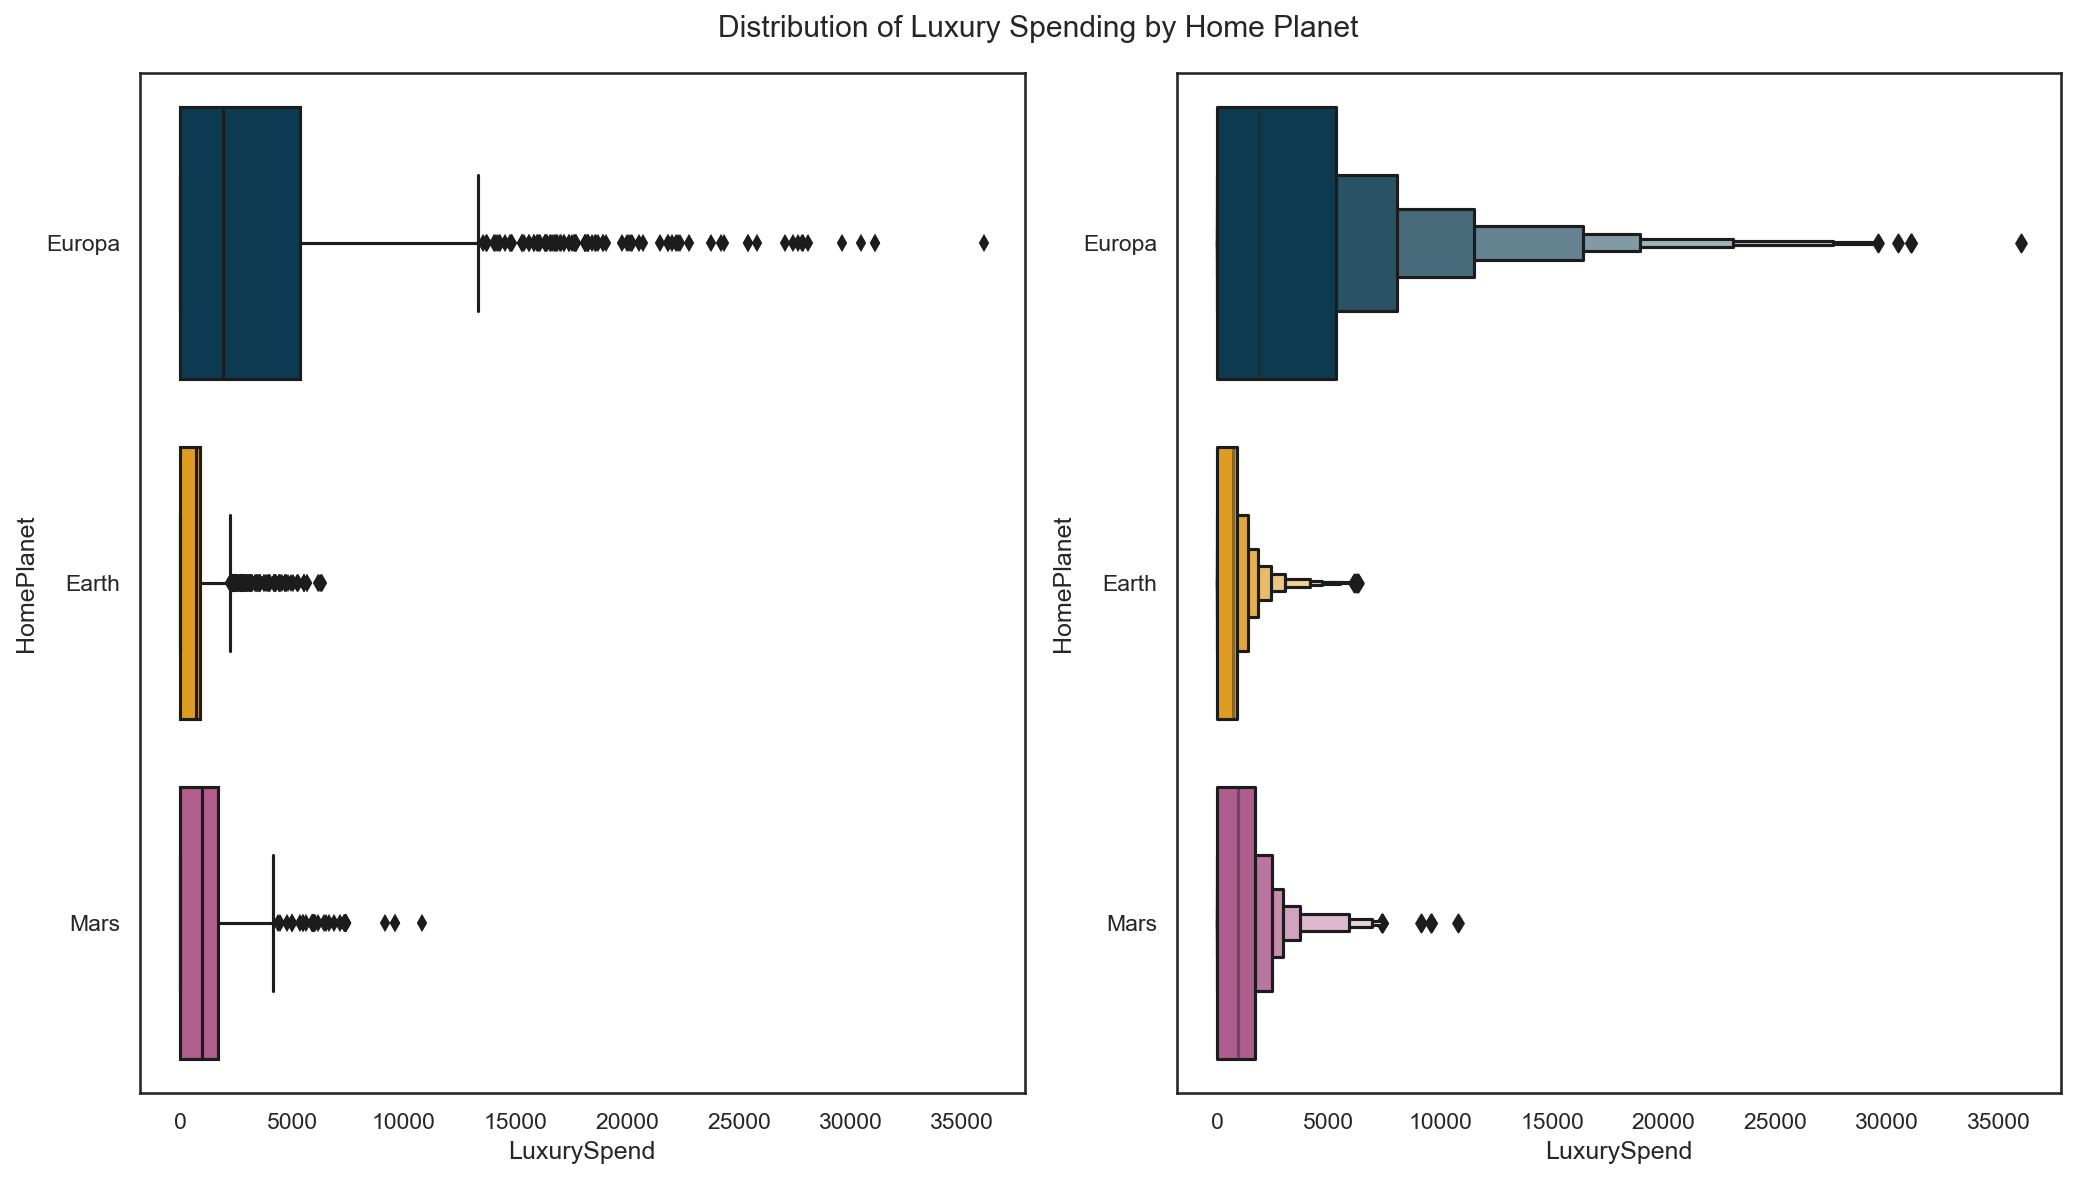

In [709]:
fig, ax = plt.subplots(ncols=2, dpi=150)
fig.suptitle('Distribution of Luxury Spending by Home Planet')
fig.set_figheight(8)
fig.set_figwidth(14)
sns.boxplot(data=df,
            y='HomePlanet',
            x='LuxurySpend', ax=ax[0], palette=CMAP)
sns.boxenplot(data=df,
            y='HomePlanet',
            x='LuxurySpend', ax=ax[1], palette=CMAP)
fig.tight_layout()

<li>It looks like passengers from Europa have worse luck than the other two, the ratio of Europa's passengers who are transported are higher. </li>
<li>They also happen to be more extravagant on average. The majority of VIP passengers are also from Europa. Interestingly, not a single person from Earth is a VIP passenger. How expensive is the ticket? Surely the Elon Musk/Jeff Bezos of that era could've afforded it.</li>

At this point, we can make a relatively solid guess at the value we should impute the missing rows with. We know that passengers from Europa spent more money, and we know none of the VIPs are from Earth. 

In [710]:
# impute HomePlanet with Europa if VIP is true where it is null. 
df.loc[(df.VIP==True) & (df.HomePlanet.isnull()), 'HomePlanet'] = 'Europa'

# impute HomePlanet with Europa if LuxurySpend is more than 6400 (max Earth spending)
df.loc[(df.HomePlanet.isnull()) & (df.LuxurySpend>6400), 'HomePlanet'] = 'Europa'

# impute the rest with Earth
df.loc[df.HomePlanet.isnull(), 'HomePlanet'] = 'Earth'

In [711]:
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
LuxurySpend       0
dtype: int64

#### CryoSleep

In [712]:
df.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

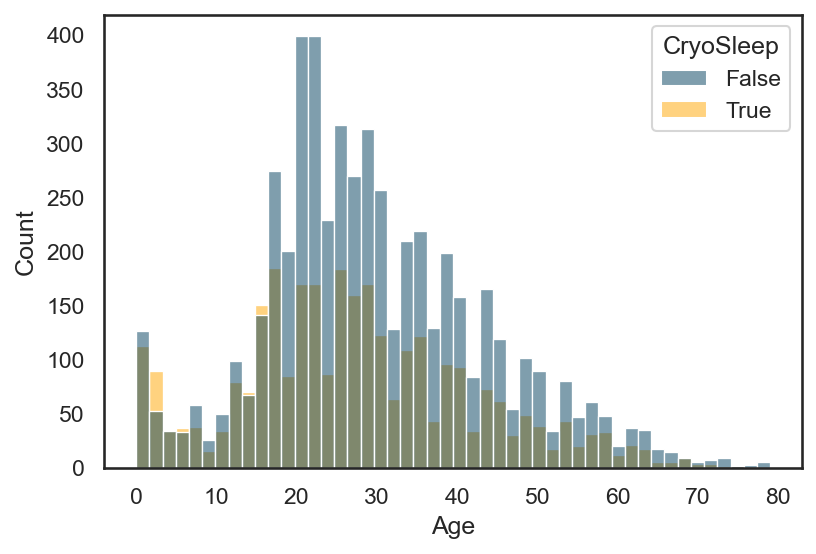

In [713]:
plt.figure(dpi=150)
sns.histplot(data=df, x='Age', hue='CryoSleep', palette=CMAP[0:2]);

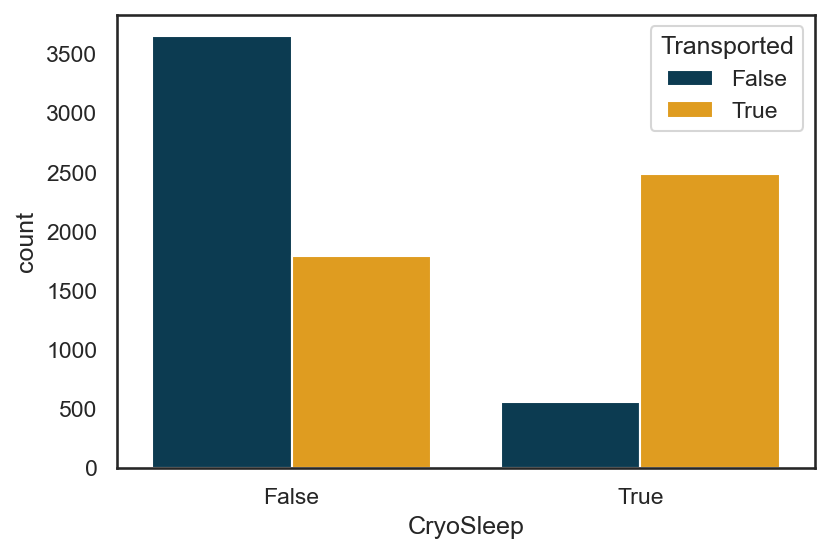

In [714]:
plt.figure(dpi=150)
sns.countplot(data=df, x='CryoSleep', hue='Transported', palette=CMAP);

<li>Passengers that are cryo sleeping are way more likely to be transported than those who are not.</li> 
<li>Those from Earth seems to prefer to be awake. </li>

Pretty hard to say what conditions it would be for someone to choose to cryosleep. We'll go with a simple mode imputation.

In [715]:
# impute missing CryoSleep
df['CryoSleep'] = df['CryoSleep'].fillna(df['CryoSleep'].mode()[0])

#### VIP

In [716]:
len(df[df.VIP==True])

199

In [717]:
df[df.VIP.isnull()]['HomePlanet'].value_counts()

Earth     118
Mars       43
Europa     42
Name: HomePlanet, dtype: int64

We don't have many VIP passengers to begin with. Only 199 in total out of 8,000+ passengers. Furthermore, most of the missing values in VIPs are from Earth, which we have seen do not have any representative in the VIP. Therefore, we'll simply impute the null values here with False

In [718]:
df['VIP'] = df['VIP'].fillna(False)

#### Destination

In [719]:
df[df.Destination.isnull()]['HomePlanet'].value_counts()

Earth     103
Mars       42
Europa     37
Name: HomePlanet, dtype: int64

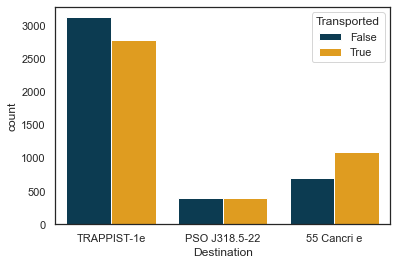

In [720]:
sns.countplot(data=df, x='Destination', hue='Transported', palette=CMAP);

<AxesSubplot:xlabel='Destination', ylabel='count'>

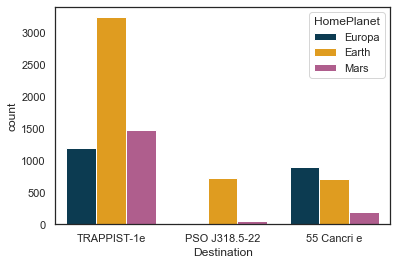

In [721]:
sns.countplot(data=df, x='Destination', hue='HomePlanet', palette=CMAP)

In [722]:
df.groupby('Destination')['HomePlanet'].value_counts()

Destination    HomePlanet
55 Cancri e    Europa         891
               Earth          716
               Mars           193
PSO J318.5-22  Earth          728
               Mars            49
               Europa          19
TRAPPIST-1e    Earth         3244
               Mars          1475
               Europa        1196
Name: HomePlanet, dtype: int64

In [723]:
df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])

#### Cabin

The Cabin column has a Deck/Num/Side formatting to it. We'll see what useful information we can get by separating them.

In [724]:
df[['CabinDeck', 'CabinNum', 'CabinSide']] = df['Cabin'].str.split('/', expand=True)

In [725]:
# convert cabin num to integer while preserving the nan values
df['CabinNum']= [int(num) if num is not np.nan else num for num in df.CabinNum]

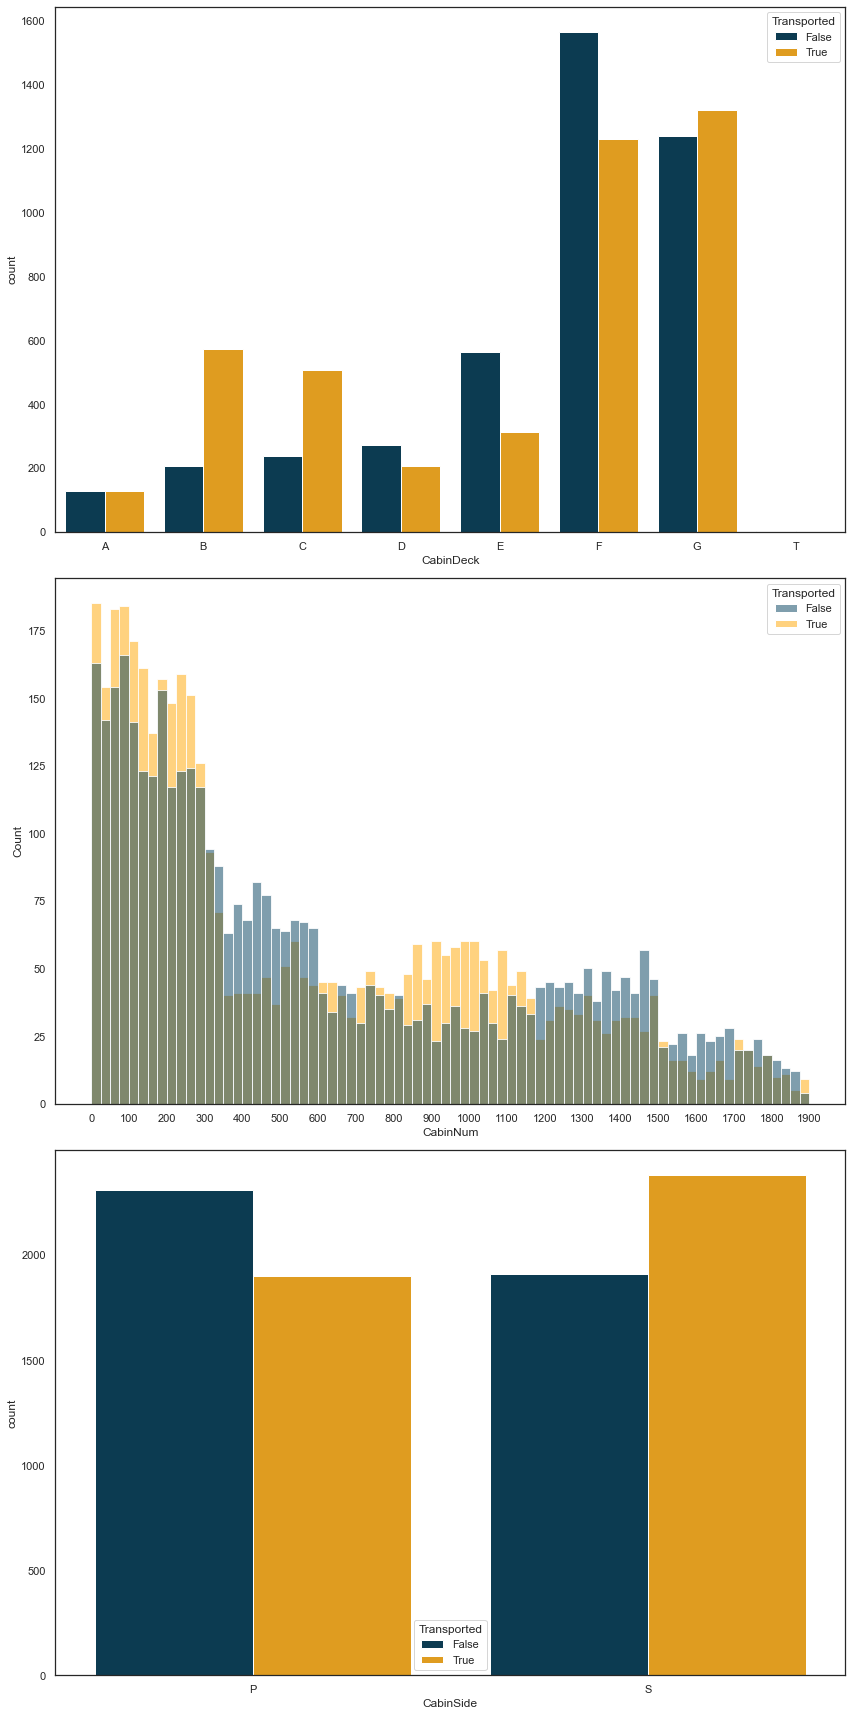

In [726]:
fig, axes = plt.subplots(figsize=(12, 24), nrows=3, ncols=1)
deck_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
# cabin deck
sns.countplot(data=df, x='CabinDeck', hue='Transported', ax=axes[0], order=deck_order, palette=CMAP[:2])

# cabin num
sns.histplot(data=df, x='CabinNum', binwidth=25, hue='Transported', ax=axes[1], palette=CMAP[:2])
axes[1].set_xticks(range(0, 2000, 100))
# cabin side
sns.countplot(data=df, x='CabinSide', hue='Transported', ax=axes[2], palette=CMAP[:2])

fig.tight_layout()
plt.show()

<li>Most people stay in Deck F or G.</li>
<li>There are 5 distinct regions based on the cabin numbers. We can see how the count fluctuates in a pattern between Transported and not Transported.</li>
<li>Passengers on the starboard side (S) are more likely to be transported.</li>

#### Cabin Deck

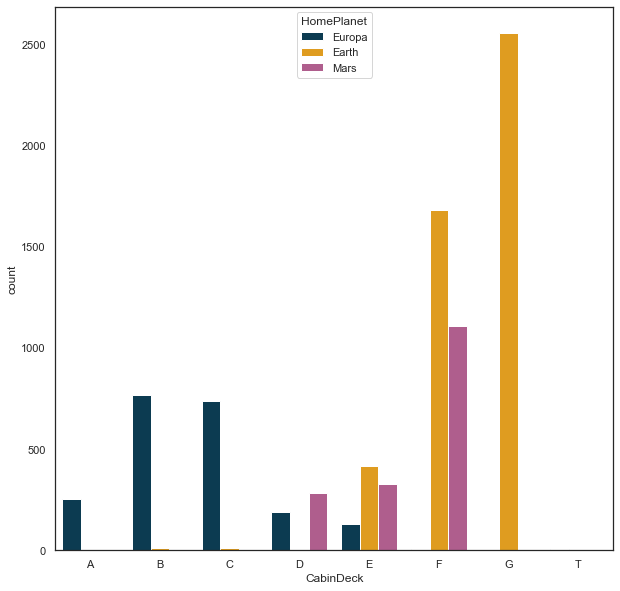

In [727]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x='CabinDeck', order=deck_order, palette=CMAP, hue='HomePlanet');

In [764]:
# see the graph in numbers
pd.crosstab(df['HomePlanet'], df['CabinDeck']).style.background_gradient(cmap='cividis')

CabinDeck,A,B,C,D,E,F,G,T
HomePlanet,,,,,,,,
Earth,2,13,11,8,416,1680,2559,1
Europa,254,766,736,188,130,4,0,4
Mars,0,0,0,282,330,1110,0,0


In [765]:
df[df['CabinDeck']=='T']

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,LuxurySpend,CabinDeck,CabinNum,CabinSide
1004,1071_01,Earth,False,TRAPPIST-1e,35.0,False,415.0,1328.0,0.0,14.0,60.0,Alraida Dingauge,False,1817.0,T,0.0,P
2254,2414_01,Europa,False,TRAPPIST-1e,42.0,False,0.0,1829.0,2.0,3133.0,2447.0,Mergak Headfair,False,7411.0,T,1.0,P
2734,2935_01,Europa,False,TRAPPIST-1e,33.0,False,0.0,28.0,0.0,6841.0,543.0,NaN,False,7412.0,T,2.0,P
2763,2971_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,3135.0,0.0,26.0,3.0,Pent Sessiouse,True,3164.0,T,3.0,P
4565,4863_01,Europa,False,TRAPPIST-1e,37.0,False,1721.0,667.0,0.0,28.0,1362.0,Phacton Unsible,False,3778.0,T,2.0,S


<li>Deck A, B, and C are almost all from Europa.</li>
<li>Deck D, E, and F are a mixture or two or three HomePlanet.</li>
<li>Deck G only has passengers from Earth.</li>
<li>Deck T is a small deck with only a few people, mostly from Europa.</li>

#### Cabin Number

There are five discernable group based on 'CabinNum' and 'Transported. 
Here are the rough grouping:
<li>Group 1: Cabin number 0-300</li>
<li>Group 2: Cabin number 300-600</li>
<li>Group 3: Cabin number 600-1200</li>
<li>Group 4: Cabin number 1200-1500</li>
<li>Group 5: Cabin number >1500</li>


In [767]:
df.loc[df.CabinNum <= 300, 'CabinGroup'] = 'Group 1'
df.loc[(300 < df.CabinNum) & (df.CabinNum <= 600), 'CabinGroup'] = 'Group 2'
df.loc[(600 < df.CabinNum) & (df.CabinNum <= 1200), 'CabinGroup'] = 'Group 3'
df.loc[(1200 < df.CabinNum) & (df.CabinNum <= 1500), 'CabinGroup'] = 'Group 4'
df.loc[df.CabinNum > 1500, 'CabinGroup'] = 'Group 5'


In [768]:
df.CabinGroup.value_counts()

Group 1    3569
Group 3    1967
Group 2    1484
Group 4     937
Group 5     537
Name: CabinGroup, dtype: int64

In [770]:
df = df.drop('CabinNum', axis=1)

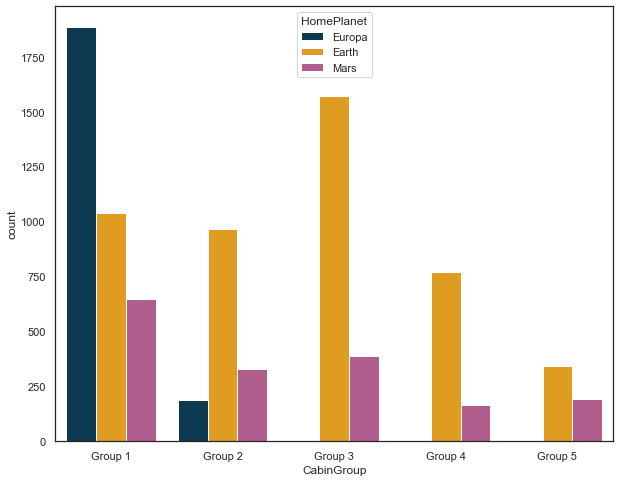

In [773]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='CabinGroup', hue='HomePlanet', palette=CMAP);

In [775]:
pd.crosstab(df['HomePlanet'], df['CabinGroup']).style.background_gradient(cmap='cividis')

CabinGroup,Group 1,Group 2,Group 3,Group 4,Group 5
HomePlanet,,,,,
Earth,1037,968,1573,769,343
Europa,1885,189,7,1,0
Mars,647,327,387,167,194


<li>Most people in Group 1 are from Europa</li>
<li>The rest of the group are predominantly from Earth</li>

Now, we impute all the cabin-related columns. 

In [778]:
# impute cabin deck
df.loc[(df.CabinDeck.isnull()) & (df.HomePlanet=='Europa'), 'CabinDeck'] = 'B'
df.loc[(df.CabinDeck.isnull()) & (df.HomePlanet=='Earth'), 'CabinDeck'] = 'G'
df.loc[(df.CabinDeck.isnull()) & (df.HomePlanet=='Mars'), 'CabinDeck'] = 'F'

# impute cabin group
df['CabinGroup'] = df['CabinGroup'].fillna(df.CabinGroup.mode()[0])

# impute cabin side
df['CabinSide'] = df['CabinSide'].fillna(df.CabinSide.mode()[0])

In [780]:
df.drop('Name', axis=1, inplace=True)

In [781]:
df.to_csv('../data/clean_data.csv', index=False)